# Análisis de Datos de Ventas

## · Importar los datos

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar los datos
df = pd.read_csv('./Datos/American Things - Base de Datos.csv', encoding='latin-1')

# LIMPIEZA DE DATOS

## Datos con formato incorrecto y datos ausentes
### Formatea las columnas "Costo", "Ventas" y "Resenia" a formato numérico, reemplazando los datos incorrectos por valores nulos(Nan) y posteriormente se reemplazan los valores nulos por la Media de cada columna

In [32]:
# Convierte los str formato numero y los errores en NaN
df['Costo'] = pd.to_numeric(df['Costo'], errors='coerce')
df['Ventas'] = pd.to_numeric(df['Ventas'], errors='coerce')
df['Resenia'] = pd.to_numeric(df['Resenia'], errors='coerce')

# Reemplaza los valores nulos(NaN) por la media de la columna
df['Costo'] = df['Costo'].fillna(df['Costo'].mean())
df['Ventas'] = df['Ventas'].fillna(df['Ventas'].mean())
df['Resenia'] = df['Resenia'].fillna(df['Resenia'].mean())

## Datos duplicados
### Borra el o los registros duplicados en la columna "Factura"

In [33]:
# Eliminar duplicados considerando solo la columna 'Factura'
df = df.drop_duplicates(subset=['Factura'])

## Datos erroneos
### Se modifican los valores erroneos en las columnas

In [43]:
# Convierte los valores a formato FECHA y los errores en NaN
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Reemplaza los valores nulos(NaN) por el último valor no nulo
df['Fecha'] = df['Fecha'].ffill()


for i in df.index:

    # Controla si el valor de las reseñas está entre 1 y 10, de lo contrario se reemplaza el valor por la media de la columna 'Resenia'
    if df.loc[i, 'Resenia'] < 1 or df.loc[i, 'Resenia'] > 10:
        df.loc[i, 'Resenia'] = df['Resenia'].mean()

    # Controla si el valor la columna "Tipo" es "Normal" o "Member", de lo contrario se reemplaza el valor por "Normal"
    if df.loc[i, "Tipo"] not in ("Normal","Member"):
        df.loc[i, "Tipo"] = "Normal"

    # Controla si el valor la columna "Costo" y "Ventas" es 0 < valor < 5000, de lo contrario se reemplaza por la mediana de cada columna
    if df.loc[i, "Costo"] <= 0 or df.loc[i, "Costo"] > 5000:
        df.loc[i, "Costo"] = df["Costo"].median()

    if df.loc[i, "Ventas"] <= 0 or df.loc[i, "Ventas"] > 5000:
        df.loc[i, "Ventas"] = df["Ventas"].median()

    # Controla si el valor la columna "Tipo" es "Normal" o "Member", de lo contrario se reemplaza el valor por "Normal"
    if df.loc[i, "Sucursal"] not in ("A","B", "C"):
        df = df.drop(i)
    
    #if len(df.loc[i, "Ciudad"]) < 5:
    #print(len(df.loc[i, "Ciudad"]))

## · Imprimir los primeros diez registros

In [35]:
print(df.head(10))

       Factura Sucursal      Ciudad    Tipo  Genero               Categoria  \
0  750-67-8428        A  Nueva York  Member  Female       Health and beauty   
1  226-31-3081        C     Houston  Normal  Female  Electronic accessories   
2  631-41-3108        A  Nueva York  Normal    Male      Home and lifestyle   
3  123-19-1176        A  Nueva York  Member    Male       Health and beauty   
4  373-73-7910        A       Green  Normal    Male       Sports and travel   
5  699-14-3026        C     Houston  Normal    Male  Electronic accessories   
6  355-53-5943        A  Nueva York  Member  Female  Electronic accessories   
7  315-22-5665        C         N/N  Normal  Female      Home and lifestyle   
8  665-32-9167        A  Nueva York  Member  Female       Health and beauty   
9  692-92-5582        B     Chicago  Member  Female                  Female   

    Costo  Ventas      Fecha   Hora Metodo de Pago   Resenia  
0  522.83  548.97 2019-01-05  13:08        Ewallet  6.996456  
1   

## ·        Describir el dataset

In [36]:
print(df.describe(include='all'))

            Factura Sucursal      Ciudad    Tipo Genero           Categoria  \
count           394      389         384     395    391                 378   
unique          394       15          15       2     10                  22   
top     750-67-8428        A  Nueva York  Normal   Male  Home and lifestyle   
freq              1      135         131     215    195                  65   
mean            NaN      NaN         NaN     NaN    NaN                 NaN   
min             NaN      NaN         NaN     NaN    NaN                 NaN   
25%             NaN      NaN         NaN     NaN    NaN                 NaN   
50%             NaN      NaN         NaN     NaN    NaN                 NaN   
75%             NaN      NaN         NaN     NaN    NaN                 NaN   
max             NaN      NaN         NaN     NaN    NaN                 NaN   
std             NaN      NaN         NaN     NaN    NaN                 NaN   

             Costo      Ventas                     

## ·        Análisis de columnas numéricas

In [37]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    print(f"Análisis de la columna numérica: {col}")
    print(f"Valores válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Media: {round(df[col].mean(), 2)}")
    print(f"Mediana: {round(df[col].median(), 2)}")
    print(f"Desviación estándar: {round(df[col].std(), 2)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna numérica: Costo
Valores válidos sobre el total: 395 / 395
Media: 315.64
Mediana: 280.62
Desviación estándar: 224.84
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna numérica: Ventas
Valores válidos sobre el total: 395 / 395
Media: 327.8
Mediana: 284.19
Desviación estándar: 233.88
Valores ausentes: 0
Valores mal registrados o erróneos: 0

Análisis de la columna numérica: Resenia
Valores válidos sobre el total: 395 / 395
Media: 7.01
Mediana: 7.0
Desviación estándar: 1.71
Valores ausentes: 0
Valores mal registrados o erróneos: 0



## ·        Análisis de columnas categóricas

In [38]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Análisis de la columna categórica: {col}")
    print(df[col].value_counts())
    print(f"Registros válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna categórica: Factura
Factura
750-67-8428    1
566-19-5475    1
633-91-1052    1
126-54-1082    1
687-15-1097    1
              ..
802-70-5316    1
191-10-6171    1
549-84-7482    1
663-86-9076    1
831-64-0259    1
Name: count, Length: 394, dtype: int64
Registros válidos sobre el total: 394 / 395
Valores ausentes: 1
Valores mal registrados o erróneos: 2

Análisis de la columna categórica: Sucursal
Sucursal
A            135
C            129
B            112
2/27/2019      2
12             1
PP             1
Cisco          1
SAda           1
Aer            1
ZZZ            1
65             1
ARCa555        1
ara            1
aaswee         1
Male           1
Name: count, dtype: int64
Registros válidos sobre el total: 389 / 395
Valores ausentes: 6
Valores mal registrados o erróneos: 12

Análisis de la columna categórica: Ciudad
Ciudad
Nueva York    131
Houston       124
Chicago       113
Male            3
N/N             2
Female          2
Green           1
5014   

## ·        Análisis de otras variables

In [39]:
other_cols = df.columns.difference(numeric_cols).difference(categorical_cols)

for col in other_cols:
    print(f"Análisis de la columna: {col}")
    print(f"Valores válidos sobre el total: {df[col].count()} / {len(df)}")
    print(f"Valores ausentes: {df[col].isna().sum()}")
    print(f"Valores mal registrados o erróneos: {df[col].isna().sum() + df[col].isnull().sum()}")
    print("")

Análisis de la columna: Fecha
Valores válidos sobre el total: 395 / 395
Valores ausentes: 0
Valores mal registrados o erróneos: 0



# GRÁFICOS 

## Gráfico de cantidad de Ventas por Ciudad

In [40]:

vta_ciudad = pd.DataFrame(df["Ciudad"].value_counts())

#plt.bar(vta_ciudad)
plt.show()


## Gráfico de porcentajes de clientes que son miembros y de los que no son miembros.
### Tienen el propósito de analizar la cantidad de clientes que se registran en la base de datos y fomentar la registración de dichos clientes para obtener mas metadatos y ofrecerles ofertas personalizadas.

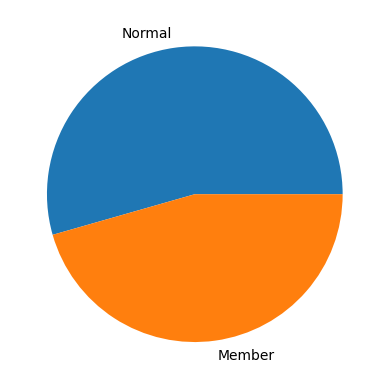

In [41]:
# Genera un grafico de torta para representar porcentajes de tipos de clientes
plt.pie(df['Tipo'].value_counts(), labels = df['Tipo'].value_counts().index)
plt.show()

## Gráfico de las reseñas de las sucursales (Calificación)

Index(['Resenia'], dtype='object')


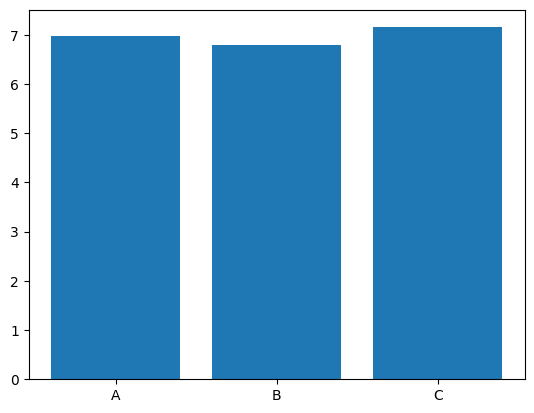

In [54]:
reseniasSucursal = pd.DataFrame(df['Resenia'].groupby(df['Sucursal']).mean())

print(reseniasSucursal.columns)

plt.bar(reseniasSucursal.index, reseniasSucursal["Resenia"])
plt.show()

## Gráfico de Ventas por categoría